In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Show plots in notebook
%matplotlib inline


In [19]:
# Dataset paths
base_dir = r"C:\Users\SIL-Laptop\Desktop\Final IAI Gustavo\steganography\FDIA 1\CNN\dataset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Parameters
img_height, img_width = 128, 128
batch_size = 32
learning_rate = 0.001
epochs = 10

# Class names (order matters here)
class_names = ['Attack', 'Normal']


In [20]:
# Data Generators (rescaling pixel values)
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    classes=class_names)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    classes=class_names)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,  # Important for correct evaluation
    classes=class_names)


Found 3072 images belonging to 2 classes.
Found 658 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [21]:
# CNN Model Definition
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary output
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 128)     

In [22]:
# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1)


Epoch 1/10
96/96 [==============================] - 44s 449ms/step - loss: 0.7036 - accuracy: 0.5303 - val_loss: 0.6905 - val_accuracy: 0.5395
Epoch 2/10
96/96 [==============================] - 36s 373ms/step - loss: 0.6881 - accuracy: 0.5443 - val_loss: 0.6127 - val_accuracy: 0.8784
Epoch 3/10
96/96 [==============================] - 36s 376ms/step - loss: 0.5252 - accuracy: 0.7292 - val_loss: 0.5970 - val_accuracy: 0.6976
Epoch 4/10
96/96 [==============================] - 36s 378ms/step - loss: 0.1314 - accuracy: 0.9554 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 5/10
96/96 [==============================] - 39s 406ms/step - loss: 0.0542 - accuracy: 0.9821 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/10
96/96 [==============================] - 37s 383ms/step - loss: 0.0128 - accuracy: 0.9971 - val_loss: 3.5415e-04 - val_accuracy: 1.0000
Epoch 7/10
96/96 [==============================] - 37s 385ms/step - loss: 0.0098 - accuracy: 0.9977 - val_loss: 6.8022e-04 - val_accuracy

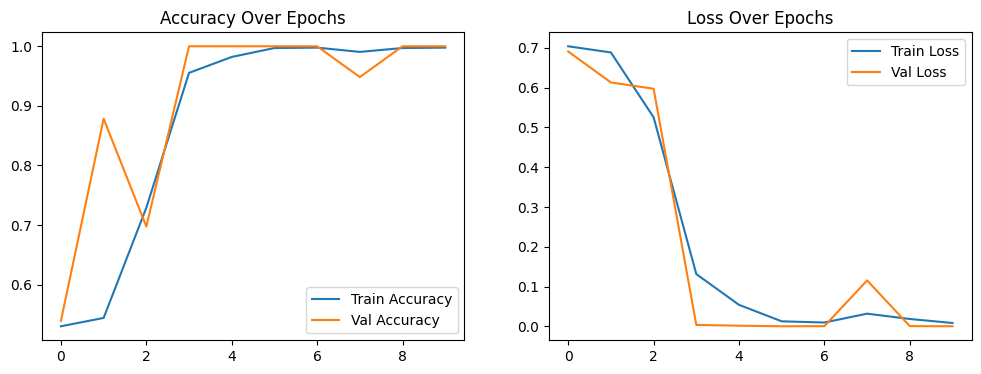

In [23]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


In [24]:
# Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")


21/21 [==============================] - 6s 298ms/step - loss: 1.8816e-04 - accuracy: 1.0000
✅ Test Accuracy: 100.00%


21/21 [==============================] - 2s 96ms/step


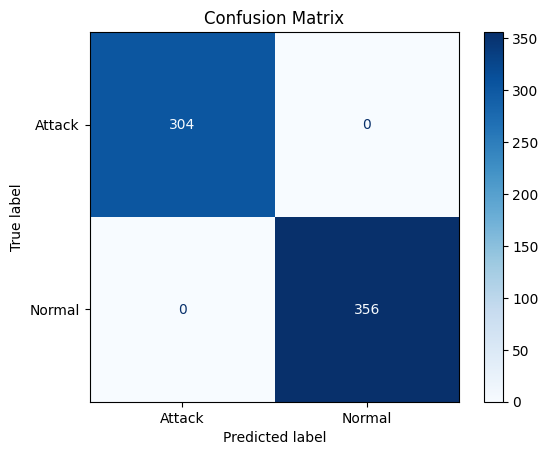

In [25]:
# Predict
pred_probs = model.predict(test_generator)
pred_labels = (pred_probs > 0.5).astype(int).flatten()
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot Confusion Matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [26]:
print("📊 Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))


📊 Classification Report:
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00       304
      Normal       1.00      1.00      1.00       356

    accuracy                           1.00       660
   macro avg       1.00      1.00      1.00       660
weighted avg       1.00      1.00      1.00       660



In [27]:
# Save the trained model
model_save_path = "CNN FDIA1/cnn_2_class_model(new).h5"
model.save(model_save_path)
print(f"💾 Model saved at: {model_save_path}")


💾 Model saved at: CNN FDIA1/cnn_2_class_model(new).h5
